## Importing the Libraries

In [1]:
import pandas as pd

## 2. Importing the Dataset

In [2]:
data = pd.read_csv('Heart_Disease_Prediction.csv')

## 3. Taking Care of Missing Values

In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## 4. Taking Care of Duplicate Values

In [4]:
data_dup = data.duplicated().any()

In [5]:
data_dup

True

In [6]:
data = data.drop_duplicates()
data_dup = data.duplicated().any()

In [7]:
data_dup

False

## 5. Data Processing

In [8]:
cate_val = []
cont_val = []

for column in data.columns:
    if data[column].nunique() <= 10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [9]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [10]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

## 6. Encoding Categorical Data

In [11]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [12]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [13]:
if 'sex' in cate_val:
    cate_val.remove('sex')
if 'target' in cate_val:
    cate_val.remove('target')
pd.get_dummies(data, columns=cate_val, drop_first=True)

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,120,211,115,1.5,1,False,True,False,...,False,True,False,False,False,False,False,False,True,False
733,44,0,108,141,175,0.6,1,False,True,False,...,False,True,False,False,False,False,False,False,True,False
739,52,1,128,255,161,0.0,0,False,False,False,...,True,False,True,True,False,False,False,False,False,True
843,59,1,160,273,125,0.0,0,False,False,True,...,False,False,True,False,False,False,False,False,True,False


In [14]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## 7. Feature Scaling

In [15]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [16]:
from sklearn.preprocessing import StandardScaler

In [18]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [19]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2,3,0
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,1.773958,0,0,3,0
2,1.724733,1,0,0.764066,-1.403197,0,1,-1.074521,1,1.342748,0,0,3,0
3,0.728383,1,0,0.935159,-0.841918,0,1,0.499898,0,-0.899544,2,1,3,0
4,0.839089,0,0,0.364848,0.919336,1,1,-1.905464,0,0.739054,1,3,2,0


## 8. Splitting the Dataset Intro Training set and Test Set

In [20]:
X = data.drop('target', axis=1)

In [21]:
y = data['target']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train, y_train, X_test, y_test

(          age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
 163 -0.710788    1   0 -0.433587  0.532247    0        0  0.718568      0   
 291  0.396267    1   0 -0.205463  0.241930    0        0 -0.855851      1   
 280 -1.042904    0   1 -0.091401 -0.241930    0        0  1.112172      0   
 85  -1.153610    1   1 -0.661712 -0.512893    0        1  0.893503      0   
 239  0.839089    0   0  1.049221 -0.048386    0        1  0.193761      1   
 ..        ...  ...  ..       ...       ...  ...      ...       ...    ...   
 267  1.392616    1   0 -0.661712 -0.183867    0        1 -3.436149      0   
 77   0.949794    1   0  0.478910 -1.151589    0        0 -0.243577      1   
 125  0.617678    0   3  1.049221 -0.125804    0        1  0.937237      0   
 522  1.392616    0   2  1.163283  0.590310    0        1  0.980971      0   
 119 -1.375021    1   1 -0.661712  0.938690    0        1  0.543632      0   
 
       oldpeak  slope  ca  thal  
 163 -0.468334      1   0   

## 9. Logistic Regression

In [28]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2,3,0
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,1.773958,0,0,3,0
2,1.724733,1,0,0.764066,-1.403197,0,1,-1.074521,1,1.342748,0,0,3,0
3,0.728383,1,0,0.935159,-0.841918,0,1,0.499898,0,-0.899544,2,1,3,0
4,0.839089,0,0,0.364848,0.919336,1,1,-1.905464,0,0.739054,1,3,2,0


In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred1 = log.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

In [39]:
print(str(int(round(accuracy_score(y_test, y_pred1), 2) * 100)) + "%")

79%


## 10. SVC (Support Vector Class)

In [41]:
from sklearn import svm # support vector machine

In [42]:
svm = svm.SVC()

In [43]:
svm.fit(X_train, y_train)

SVC()

In [44]:
y_pred2 = svm.predict(X_test)

In [47]:
print(str(int(round(accuracy_score(y_test, y_pred2), 2) * 100)) + "%")

84%


## 11. KNeighbours Classifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier()

In [53]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [54]:
y_pred3 = knn.predict(X_test)

In [57]:
print(str(int(round(accuracy_score(y_test, y_pred3), 2)* 100)) + "%")

74%


In [62]:
score = []

for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test, y_pred))

In [63]:
score

[0.6885245901639344,
 0.7704918032786885,
 0.7377049180327869,
 0.7704918032786885,
 0.7377049180327869,
 0.7213114754098361,
 0.7540983606557377,
 0.7377049180327869,
 0.7704918032786885,
 0.7704918032786885,
 0.8032786885245902,
 0.819672131147541,
 0.7540983606557377,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7540983606557377,
 0.7868852459016393,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393]

In [72]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print(str(int(round(accuracy_score(y_test, y_pred), 2)*100))+ "%")

82%


## Non-Linear Algorithms

In [74]:
data = pd.read_csv("Heart_Disease_Prediction.csv")

In [75]:
data = data.drop_duplicates()

In [76]:
data.shape

(302, 14)

In [77]:
X = data.drop('target', axis=1)
y = data['target']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

## 12. Decision Tree Classifier

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
dt = DecisionTreeClassifier()

In [82]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [83]:
y_pred4 = dt.predict(X_test)

In [85]:
print(str(int(round(accuracy_score(y_test, y_pred4), 2)*100))+ "%")

74%


## 13. Random Forest Classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
rf = RandomForestClassifier()

In [91]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [92]:
y_pred5 = rf.predict(X_test)

In [94]:
print(str(int(round(accuracy_score(y_test, y_pred5), 2)*100))+ "%")

79%


## 14. Gradient Boosting Classifier

In [96]:
from sklearn.ensemble import GradientBoostingClassifier

In [97]:
gbc = GradientBoostingClassifier()

In [98]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [99]:
y_pred6 = gbc.predict(X_test)

In [101]:
print(str(int(round(accuracy_score(y_test, y_pred6final_data = pd.DataFrame({
    "Models": ['LR', 'SVM', 'KNN', 'DT', 'RF', 'GBC'],
    'ACC': [accuracy_score(y_test, y_pred1),
            accuracy_score(y_test, y_pred2),
            accuracy_score(y_test, y_pred3),
            accuracy_score(y_test, y_pred4),
            accuracy_score(y_test, y_pred5),
            accuracy_score(y_test, y_pred6)]
})), 2)*100))+ "%")

80%


In [132]:
final_data = pd.DataFrame({
    "Models": ['LR', 'SVM', 'KNN', 'DT', 'RF', 'GBC'],
    'ACC': [str(round(accuracy_score(y_test, y_pred1), 2) * 100),
            str(round(accuracy_score(y_test, y_pred2), 2) * 100),
            str(round(accuracy_score(y_test, y_pred3), 2) * 100),
            str(round(accuracy_score(y_test, y_pred4), 2) * 100),
            str(round(accuracy_score(y_test, y_pred5), 2) * 100),
            str(round(accuracy_score(y_test, y_pred6), 2) * 100)]
})

In [133]:
final_data

,Models,ACC
0,LR,79.0
1,SVM,84.0
2,KNN,74.0
3,DT,74.0
4,RF,79.0
5,GBC,80.0


In [126]:
import seaborn as sn
import matplotlib.pyplot as plt

<Axes: xlabel='Models', ylabel='ACC'>

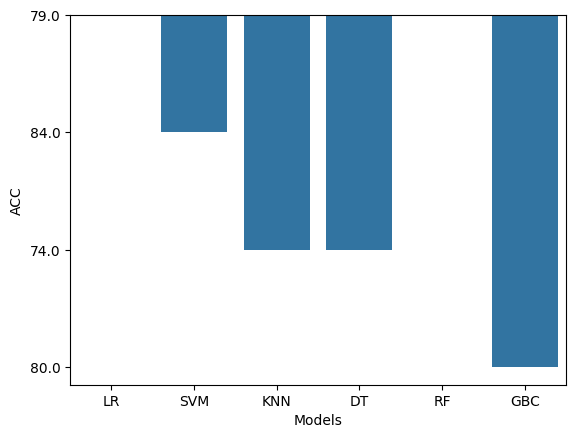

In [137]:
sns.barplot(x='Models', y='ACC', data=final_data)

In [139]:
x = data.drop('target', axis = 1)
y = data['target']

In [140]:
X.shape

(302, 13)

In [141]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier()

## 15. Prediction on New Data

In [143]:
import pandas as pd

In [144]:
new_data=pd.DataFrame({
    'age': 52,
    'sex': 1,
    'cp': 0,
    'trestbps': 125,
    'chol': 212,
    'fbs': 0,
    'restecg': 1,
    'thalach': 168,
    'exang': 0,
    'oldpeak': 1.0,
    'slope': 2,
    'ca': 2,
    'thal': 3,
}, index = [0])

In [145]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [148]:
p = rf.predict(new_data)
if p[0] == 0:
    print("No Disease")
else:
    print("Disease")

No Disease


## 16. Save the model using Joblib

In [149]:
import joblib

In [150]:
joblib.dump(rf, 'model_joblib_heart')

['model_joblib_heart']

In [151]:
model = joblib.load('model_joblib_heart')

In [152]:
model.predict(new_data)

array([0], dtype=int64)

In [153]:
## GUI

In [161]:
from tkinter import *
import joblib

In [ ]:
from tkinter import *
import joblib
import numpy as np
from sklearn import *
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

C:\Users\yashw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\yashw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\yashw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\yashw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\yashw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid